## Lighthouse Labs
### W09D2 Time Series II

Instructor: Samuel Boylan

Jan 4, 2021

Notebook modified from Andrew & Socorro. 

**What will we learn today?**

* Facebook Prophet

* Time Series as a Supervised Learning problem

* Deep Learning for Stock Prediction

* Time Series Final Project Ideas

## Facebook Prophet

* FB Prophet is a procedure for forecasting time series data using a powerful toolkit created by Facebook. It allows us to decompose and model trends from time series data.

* It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.


### Why use Facebook Prophet?

* It is accurate and fast
    * It is used in many applications across Facebook and it produces reliable forecasts for planning and goal setting.
    * Forescasts in a few seconds.
* Fully automatic
    * No manual effort. Robust to outliers, missing data, changes in time series.
* Tunable forecasts
    * Users can tweak and adjust forecasts. Add your domain knowledge!
* R or Python

*   Allows us to solve various Business Analytics Questions




### Predicting and Decomposing Online Sales for a Company using FB Prophet!

In [ ]:
# Load packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import requests, json, os, warnings, re

# ignore warnings
import warnings
warnings.simplefilter("ignore", UserWarning)

In [ ]:
# !pip list

In [ ]:
# Model Initialize

# !pip install prophet # if you havn't done so
import fbprophet
from fbprophet import Prophet

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/nicknochnack/TimeSeriesForecastingProphet/main/dataset.csv")

In [ ]:
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [ ]:
# df['Time Date'].apply(lambda x: print(x))

In [ ]:
df.head()

,Value,datetime
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


In [ ]:
# # Preprocess the data
df.head()

df["Year"] = df["Time Date"].apply(lambda x: str(x)[-4:])
df['Month'] = df["Time Date"].apply(lambda x: str(x)[-6:-4])
df['Day'] = df["Time Date"].apply(lambda x: str(x)[:-6])

df['datetime'] = pd.DatetimeIndex(df['Year'] + '-' + df['Month'] + '-' + df['Day'])

df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)



In [ ]:
df.columns = ['y', 'ds']

df = df[['ds', 'y']]

In [ ]:
df.head(15)

,ds,y
0,2018-01-01,2926.0000
1,2018-01-02,2687.5310
2,2018-01-03,2793.0000
3,2018-01-04,2394.0000
4,2018-01-05,2660.0000
5,2018-01-06,2527.0000
6,2018-01-07,2527.0000
7,2018-01-08,2793.0000
8,2018-01-09,2793.0000
9,2018-01-10,2793.0000


In [ ]:
#Instatiate model
m = Prophet(interval_width=0.95, weekly_seasonality=True)

model = m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#Forecast into the future
future = m.make_future_dataframe(periods=365)

forecast = m.predict(future)

In [ ]:
forecast.head()[['ds', 'yhat_lower', 'yhat_upper', 'yhat']]


,ds,yhat_lower,yhat_upper,yhat
0,2018-01-01,913.419448,3911.428569,2395.939018
1,2018-01-02,789.009627,3925.794319,2386.653185
2,2018-01-03,767.316617,3903.469534,2413.324997
3,2018-01-04,821.243600,4066.760727,2461.083054
4,2018-01-05,785.740112,3952.914021,2425.901923


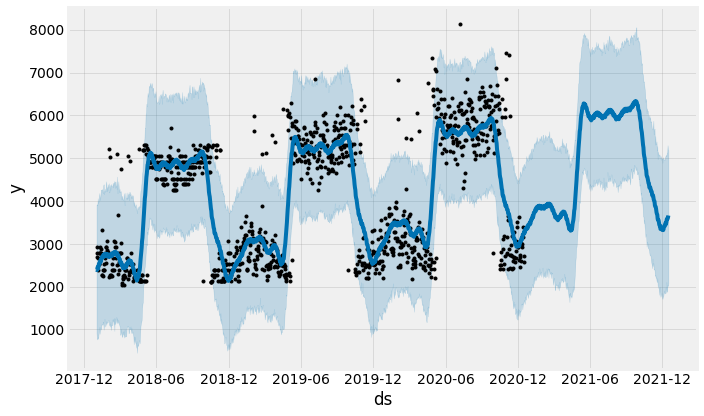

In [ ]:
#Plot
plot1 = m.plot(forecast)

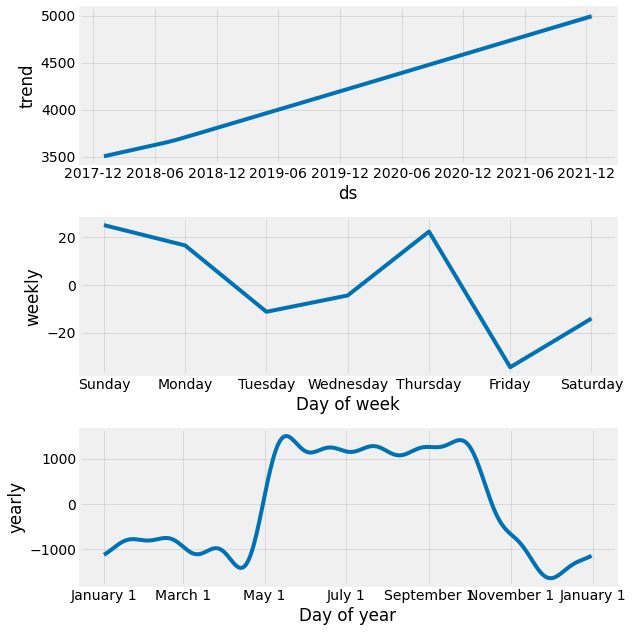

In [ ]:
# Decompose your data
plot2 = m.plot_components(forecast)

## Time Series Forecasting as Supervised Learning

Review:
* What is Supervised Learning? 
    
* How is data given in SL?

Supervised learning is where you have input variables (X) and an output variable (y) and you use an algorithm to learn the mapping function from the input to the output.

$Y = f(X)$

We can Shift our time series data to create a Y label

Lets see this in an example for predicting the Future Price of Any Stock with an LSTM! 

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense,LSTM

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
#Download data from here! https://ca.finance.yahoo.com/

In [ ]:
df = pd.read_csv("BTC-USD.csv")

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-26,35384.031250,40499.675781,35287.312500,37337.535156,37337.535156,51022126212
1,2021-07-27,37276.035156,39406.941406,36441.726563,39406.941406,39406.941406,35097370560
2,2021-07-28,39503.187500,40816.070313,38862.437500,39995.906250,39995.906250,38702404695
3,2021-07-29,39995.453125,40593.070313,39352.058594,40008.421875,40008.421875,27167146027
4,2021-07-30,40027.484375,42235.546875,38397.355469,42235.546875,42235.546875,33072782960
...,...,...,...,...,...,...,...
361,2022-07-22,23163.751953,23671.927734,22603.416016,22714.978516,22714.978516,31421555646
362,2022-07-23,22706.984375,22977.210938,22002.910156,22465.478516,22465.478516,24021799169
363,2022-07-24,22465.509766,22974.001953,22306.839844,22609.164063,22609.164063,23565495303
364,2022-07-25,22607.156250,22649.121094,21361.642578,21361.701172,21361.701172,35574561406


In [ ]:
df.shape

(366, 7)

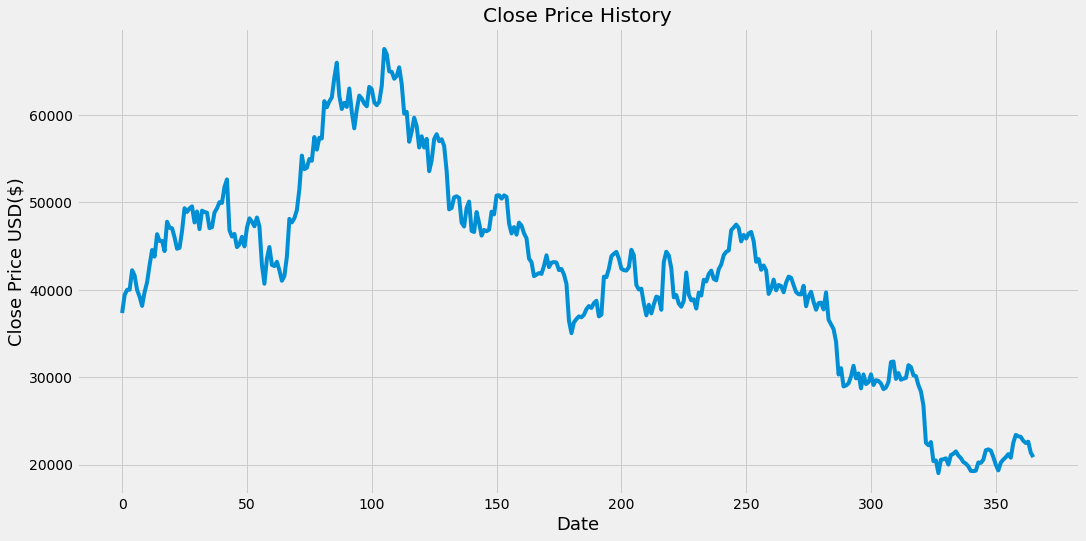

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.show()

In [ ]:
data=df.filter(['Close'])
dataset=data.values
training_data_len= math.ceil(len(dataset) * .8)

#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.37734706],
       [0.41997201],
       [0.43210331],
       [0.4323611 ],
       [0.47823468],
       [0.46568346],
       [0.43167052],
       [0.41574956],
       [0.39414333],
       [0.4269868 ],
       [0.45009843],
       [0.49020096],
       [0.5260265 ],
       [0.51041999],
       [0.56330007],
       [0.54722625],
       [0.5474035 ],
       [0.52340006],
       [0.59271185],
       [0.57836815],
       [0.57733948],
       [0.555866  ],
       [0.52890108],
       [0.5310809 ],
       [0.57055407],
       [0.62455287],
       [0.61562   ],
       [0.62419193],
       [0.62881602],
       [0.59091567],
       [0.61675899],
       [0.57518115],
       [0.61877506],
       [0.61555636],
       [0.61406158],
       [0.57750385],
       [0.57980468],
       [0.61441576],
       [0.62431696],
       [0.63868697],
       [0.63702371],
       [0.67428047],
       [0.69240899],
       [0.572481  ],
       [0.55765607],
       [0.56383601],
       [0.53278479],
       [0.539

In [ ]:
test = df['Close']
test.head()

0    37337.535156
1    39406.941406
2    39995.906250
3    40008.421875
4    42235.546875
Name: Close, dtype: float64

In [ ]:
#df.shift(30)
# df2.T.head(50)

In [ ]:
#Create training data set
#This is where we shift the data

train_data=scaled_data[0:training_data_len,:]

#split the data into x_train and y_train data sets

x_train =[]
y_train=[]

numDays = 30

for i in range(numDays,len(train_data)):
  x_train.append(train_data[i-numDays:i,0])
  y_train.append(train_data[i,0])

In [ ]:
# y_train

In [ ]:
len(x_train)

263

In [ ]:
len(y_train)

263

In [ ]:
#convert train data to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

#Reshape
x_train.shape

(263, 30)

In [ ]:
# x_train

In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(263, 30, 1)

In [ ]:
x_train.shape[1]

30

In [ ]:
# build LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(25))
model.add(Dense(1))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 30, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 52,751
Trainable params: 52,751
Non-traina

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')


In [ ]:
#train the model
model.fit(x_train,y_train,batch_size=2,epochs=2)

Epoch 1/2
129/132 [============================>.] - ETA: 0s - loss: 0.0219

In [ ]:
#create the testing data set
#create a new array containing scaled values from index 1543 to 2003
test_data=scaled_data[training_data_len - numDays:,:]
#create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(numDays,len(test_data)):
  x_test.append(test_data[i-numDays:i,0])

#convert the data to a numpy array
x_test=np.array(x_test)
#reshape
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

  

In [ ]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


In [ ]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

**Time Series Final Project Brainstorm - exercise**



*   Climate Change Forecast

*   Food Demand Forecasting


*   Using XGBoost and its variants to predict Stock Prices and hook it up to https://alpaca.markets/


*   Data Science Tournament, you can get paid to build financial models! https://numer.ai/





*   Want to go more in depth into Making money with the power of data science?  I highly recommend this textbook! https://www.amazon.ca/Advances-Financial-Machine-Learning-Marcos/dp/1119482089/ref=asc_df_1119482089/?tag=googleshopc0c-20&linkCode=df0&hvadid=292982483438&hvpos=&hvnetw=g&hvrand=3604397138690398481&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=9001010&hvtargid=pla-422557754574&psc=1




